--- 
### 의사결정방법 ==================
- 결정트리 => 전처리가 의미없음
- 균일한 데이터로 분류/회귀하는 것
- 규칙 => 피처/특성들이 얼마나 잘 데이터를 균일하게 나누어 주는지
- 문제 => 과적합(Overfiting)
- 하이퍼파라미터 많음

# [1] 데이터 준비 및 확인

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn.tree import plot_tree, export_graphviz,export_text

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
irisBunch = load_iris()

In [3]:
for _key in irisBunch.keys():
    print(f'{_key} \n {irisBunch[_key]}')

data 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9

In [4]:
# 분류용 데이터 
data = irisBunch['data']
target = irisBunch['target']

In [9]:
data.shape, target.shape

((150, 4), (150,))

### [2] 학습용 데이터 분리 => 학습, 테스트데이터

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target,random_state=1, test_size=0.2)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

### [3] 학습 모델 객체 생성 및 학습

In [6]:
dtModel = DecisionTreeClassifier(max_depth=2) #모든 파라미터의 기본값 사용
dtModel = DecisionTreeClassifier(max_depth=2,criterion='entropy',splitter='random') #모든 파라미터의 기본값 사용

In [7]:
dtModel.fit(X_train,y_train)


DecisionTreeClassifier()

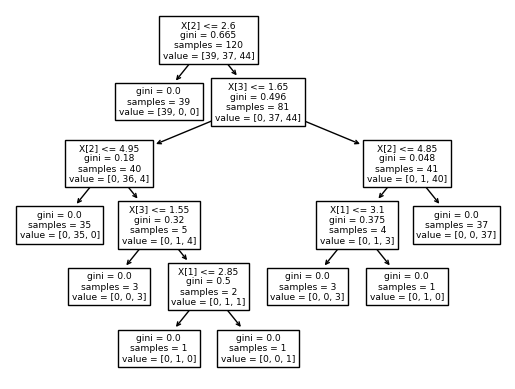

In [8]:
plot_tree(dtModel)
plt.savefig('defalut_tree.jpg') #저장

In [18]:
print(export_text(dtModel))

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [19]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.tree import export_graphviz

In [10]:
export_graphviz(dtModel,out_file='tree.dot',class_names=irisBunch.target_names, 
                feature_names=irisBunch.feature_names, impurity=True,filled=True)

#

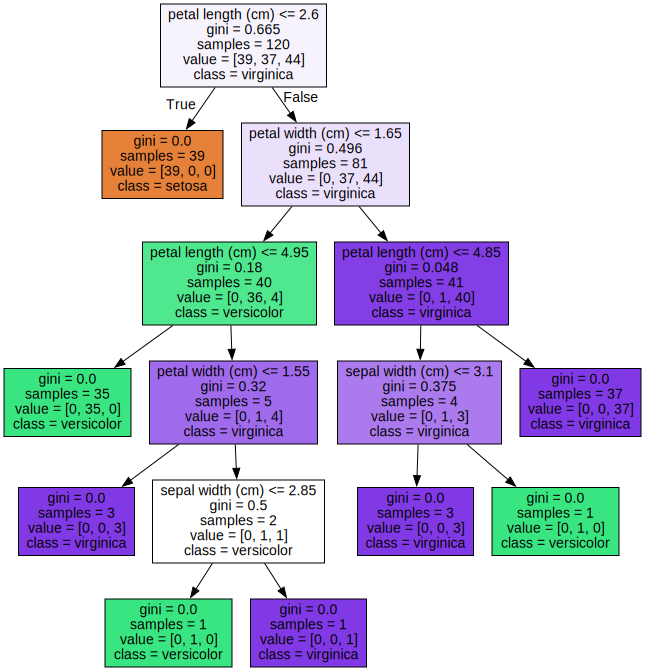

In [11]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [12]:
dtModel.max_features

In [13]:
dtModel.classes_

array([0, 1, 2])

In [14]:
dtModel.feature_importances_ #끝에 _붙어 있는 것들은 속성이다.

array([0.        , 0.03133487, 0.57201197, 0.39665316])